## Criar alguns graficos auxiliando a entrega e facilitando o storytelling ao apresentar as respostas de algumas perguntas anteriores ao CEO.

### Steps:

#### 1. Crie uma nova coluna chamada: “dormitory_type”
    - Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
    - Se o valor da coluna “bedrooms” for igual a 2 => ‘apartament’
    - Se o valor da coluna “bedrooms” for maior que 2 => ‘house’


#### 2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.


#### 3. Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.


#### 4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.


#### 5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos 
#### imóveis, a partir do ano de 1930.


#### 6. Faça um tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos 
#### imóveis.


#### 7. Crie um Dashboard com os gráficos das questões 02, 03, 04 ( Dashboard: 1 Linha e 2 colunas )


#### 8. Crie um Dashboard com os gráficos das perguntas 02, 04 ( Dashboard: 2 colunas )


#### 9. Crie um Dashboard com os gráficos das perguntas 03, 05 ( Dashboard: 2 Linhas )


#### 10. Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import gridspec
import plotly.express as px

In [3]:
datahouses = pd.read_csv('kc_house_data.csv')
#formatar data
datahouses['date'] = pd.to_datetime( datahouses['date'], format='%Y-%m-%d' )
#remover notação cientifica
pd.set_option('display.float_format', lambda x:'%.3f' % x)

#### 1. Crie uma nova coluna chamada: “dormitory_type”
    - Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
    - Se o valor da coluna “bedrooms” for igual a 2 => ‘apartament’
    - Se o valor da coluna “bedrooms” for maior que 2 => ‘house’

In [4]:
datahouses.loc[datahouses['bedrooms'] == 1, 'dormitory_type'] = 'studio'
datahouses.loc[datahouses['bedrooms'] == 2, 'dormitory_type'] = 'apartament'
datahouses.loc[datahouses['bedrooms'] >= 3, 'dormitory_type'] = 'house'

In [5]:
datahouses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dormitory_type
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,...,1180,0,1955,0,98178,47.511,-122.257,1340,5650,house
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0,0,...,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,house
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0,0,...,770,0,1933,0,98028,47.738,-122.233,2720,8062,apartament
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0,0,...,1050,910,1965,0,98136,47.521,-122.393,1360,5000,house
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0,0,...,1680,0,1987,0,98074,47.617,-122.045,1800,7503,house


#### 2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.


<BarContainer object of 13 artists>

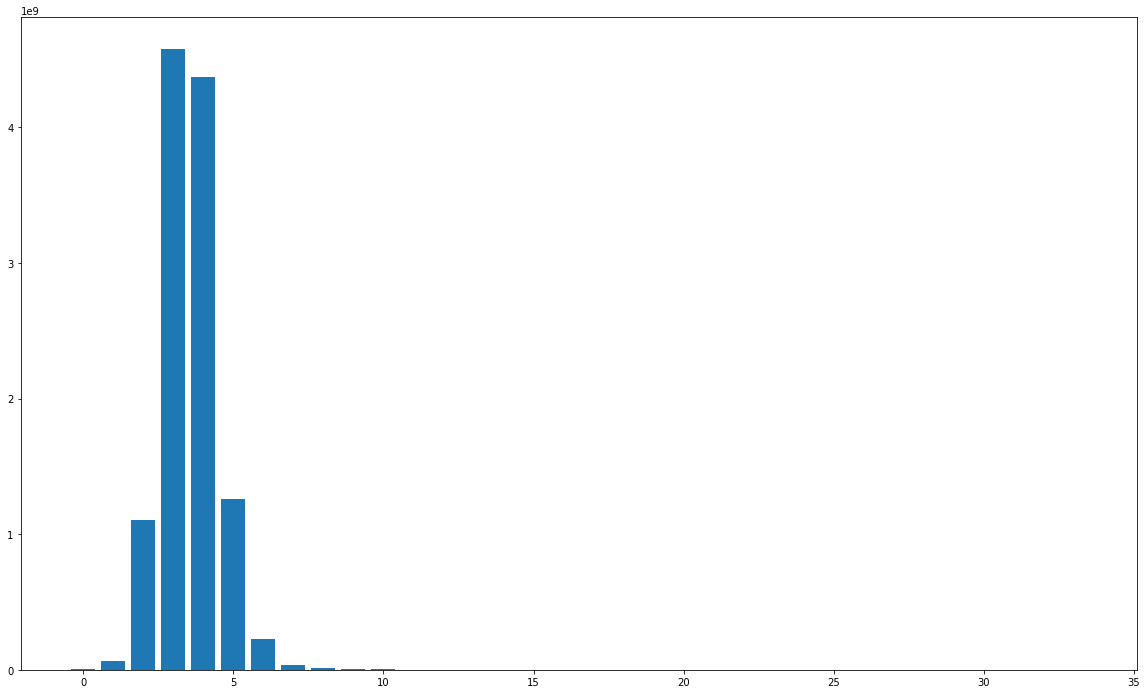

In [10]:
sum_price_bedrooms = datahouses[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()
#Definir o tamanho da figura a ser plotada
plt.figure(figsize=(20,12))
plt.bar(sum_price_bedrooms['bedrooms'], sum_price_bedrooms['price'])

#### 3. Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.


<BarContainer object of 116 artists>

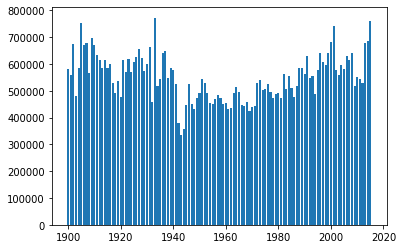

In [21]:
mean_price_yr_built = datahouses[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
plt.bar(mean_price_yr_built['yr_built'], mean_price_yr_built['price'])

#### 4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.


<BarContainer object of 3 artists>

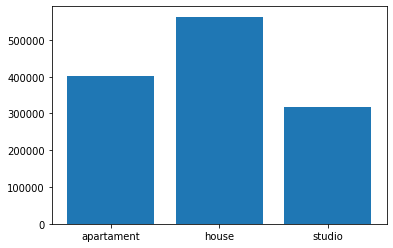

In [25]:
mean_price_bedrooms = datahouses[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()
plt.bar(mean_price_bedrooms['dormitory_type'], mean_price_bedrooms['price'])

#### 5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930.

<BarContainer object of 69 artists>

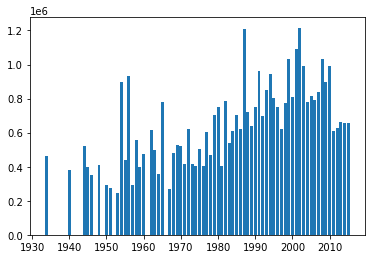

In [39]:
df = datahouses.loc[datahouses['yr_renovated'] >= 1930]
df_yr_renovated_1930 = df[['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()
plt.bar(df_yr_renovated_1930['yr_renovated'], df_yr_renovated_1930['price'])

#### 6. Faça um tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.

In [41]:
df = datahouses[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()
df.head()


,dormitory_type,price
0,apartament,401372.682
1,house,563092.212
2,studio,317642.884


#### 7. Crie um Dashboard com os gráficos das questões 02, 03, 04 ( Dashboard: 1 Linha e 2 colunas )


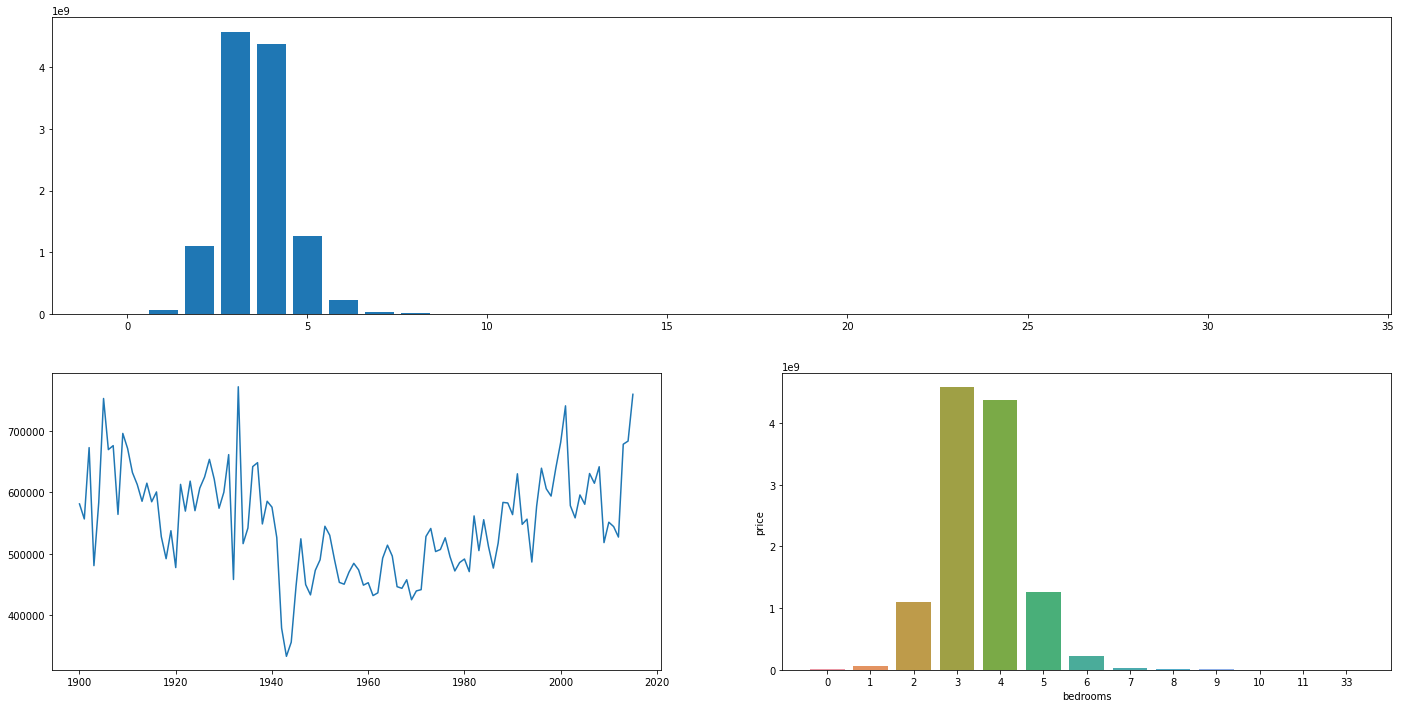

In [45]:
fig = plt.figure( figsize=(24, 12) )
specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig )

ax1 = fig.add_subplot( specs[0, :] ) # First Row
ax2 = fig.add_subplot( specs[1, 0] ) # First Row First Column
ax3 = fig.add_subplot( specs[1, 1] ) # Second Row First Column

# Frist Graph
df = datahouses[['price', 'bedrooms']].groupby( 'bedrooms' ).sum().reset_index()
sns.barplot( x='bedrooms', y='price', data=df );
ax1.bar( df['bedrooms'], df['price'] )

# Second Graph
df = datahouses[['price', 'yr_built']].groupby( 'yr_built' ).mean().reset_index()
ax2.plot( df['yr_built'], df['price'] );

# Third Graph
df = datahouses[['price', 'dormitory_type']].groupby( 'dormitory_type' ).mean().reset_index()
ax3.bar( df['dormitory_type'], df['price'] );

#### 8. Crie um Dashboard com os gráficos das perguntas 02, 04 ( Dashboard: 2 colunas )

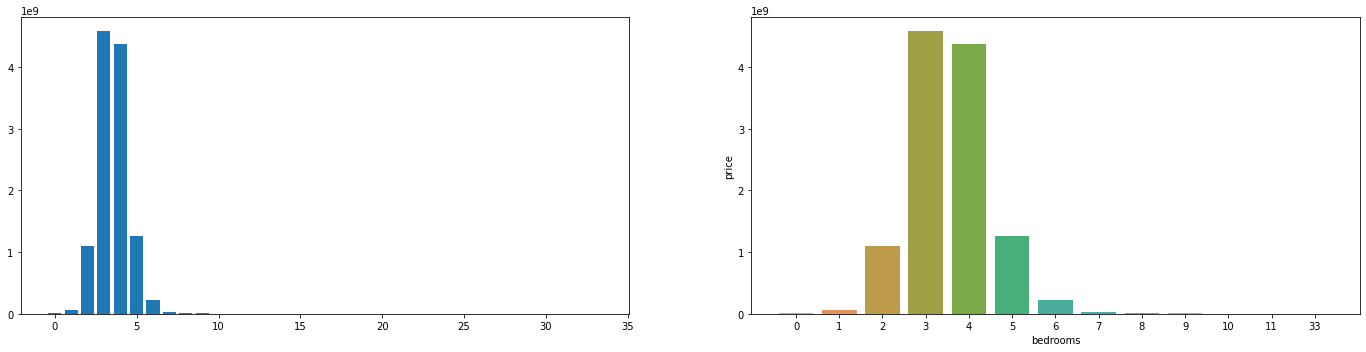

In [48]:
fig = plt.figure( figsize=(24, 12) )
specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig )

ax1 = fig.add_subplot( specs[0, 0] ) # First Row First Column
ax2 = fig.add_subplot( specs[0, 1] ) # Second Row First Column

# Frist Graph
df = datahouses[['price', 'bedrooms']].groupby( 'bedrooms' ).sum().reset_index()
sns.barplot( x='bedrooms', y='price', data=df );
ax1.bar( df['bedrooms'], df['price'] )

# Second Graph
df = datahouses[['price', 'dormitory_type']].groupby( 'dormitory_type' ).mean().reset_index()
ax2.bar( df['dormitory_type'], df['price'] );

#### 9. Crie um Dashboard com os gráficos das perguntas 03, 05 ( Dashboard: 2 Linhas )

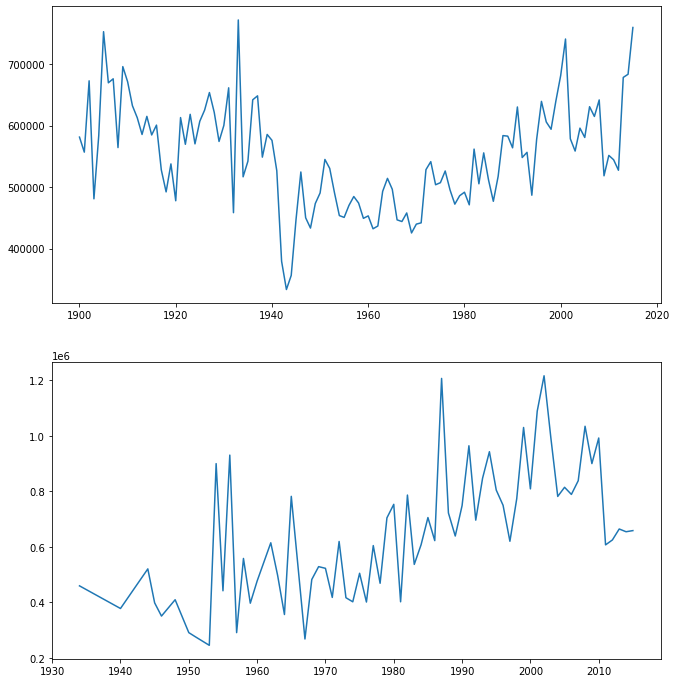

In [51]:
fig = plt.figure( figsize=(24, 12) )
specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig )

ax1 = fig.add_subplot( specs[0, 0] ) # First Row First Column
ax2 = fig.add_subplot( specs[1, 0] ) # Second Row First Column

# Frist Graph
df = datahouses[['price', 'yr_built']].groupby( 'yr_built' ).mean().reset_index()
ax1.plot( df['yr_built'], df['price'] );

# Second Graph
df = datahouses.loc[datahouses['yr_renovated'] > 1930, ['price', 'yr_renovated']].groupby( 'yr_renovated' ).mean().reset_index()
ax2.plot( df['yr_renovated'], df['price'] );

#### 10. Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar 

In [57]:
houses = datahouses[['id', 'lat', 'long', 'price', 'sqft_living']].copy()


# define level of prices
houses['level'] = houses['price'].apply( lambda x: 0 if x <= 321950 else
                                                   1 if (x > 321950 ) & ( x <= 450000 ) else
                                                   2 if (x > 450000 ) & ( x <= 645000 ) else 3 )
# convert level to astype
houses['level'] = houses['level'].astype( int )

fig = px.scatter_mapbox( houses, 
                         lat="lat", 
                         lon="long", 
                         color='level',
                         size="sqft_living",
                         color_continuous_scale=px.colors.cyclical.IceFire, 
                         size_max=15, 
                         zoom=10)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(height=600, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


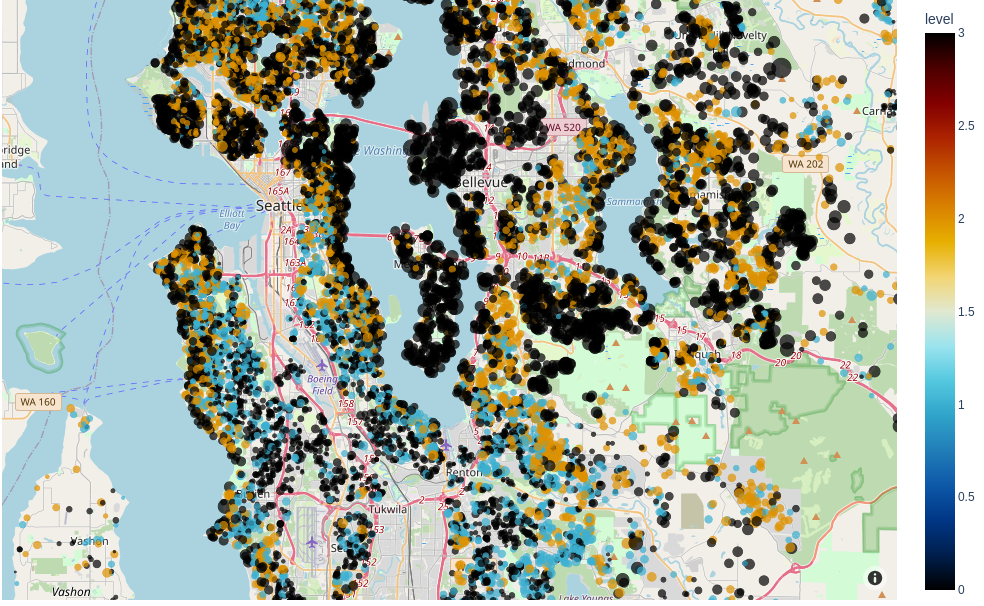

In [66]:
# Adicionado essa imagem apenas para exibir o resultado do ultimo step pois o github não exbibe um resultado de HTML.
from IPython.display import Image
Image(filename='open-street-map.png') 